In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
column_names = ["Freq_"+str(i) for i in range(1,61)]
column_names.append("Label")
df.columns = column_names

In [5]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


## Data Exploration

Creating a heatmap of the correlation between the difference frequency responses.

<AxesSubplot:>

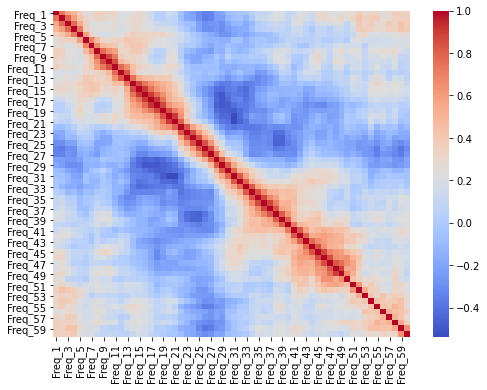

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')

Top 5 correlated frequencies with the target\label?

In [7]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [8]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_10    0.342199
Freq_45    0.342801
Freq_49    0.350441
Freq_12    0.390331
Freq_11    0.431452
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X = df.drop(['Target','Label'],axis=1)
y = df['Label']

In [11]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Creating a PipeLine that contains both a StandardScaler and a KNN model

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [13]:
scaler = StandardScaler()

In [14]:
knn = KNeighborsClassifier()

In [15]:
operations = [('scaler',scaler),('knn',knn)]

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
pipe = Pipeline(operations)

### Performing a grid-search with the pipeline to test various values of k and report back the best performing parameters.

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
k_values = list(range(1,30))

In [20]:
param_grid = {'knn__n_neighbors': k_values}

In [21]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [22]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [23]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Using the .cv_results_ dictionary, to create a plot of the mean test scores per K value.**

In [24]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.86059744, 0.77411095, 0.84423898, 0.77923186, 0.80099573,
       0.75803698, 0.76870555, 0.76358464, 0.79046942, 0.77980085,
       0.77439545, 0.75291607, 0.75817923, 0.74751067, 0.75291607,
       0.75291607, 0.7311522 , 0.73655761, 0.73641536, 0.74182077,
       0.74182077, 0.71493599, 0.73100996, 0.7257468 , 0.73655761,
       0.72034139, 0.72048364, 0.71522048, 0.72048364])

Text(0, 0.5, 'Accuracy')

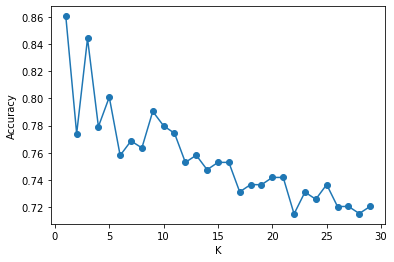

In [25]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

###  Model Evaluation

In [26]:
pred = full_cv_classifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
confusion_matrix(y_test,pred)

array([[13,  1],
       [ 0,  7]], dtype=int64)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       1.00      0.93      0.96        14
           R       0.88      1.00      0.93         7

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



###  Got a good Score than other models tested. Further updation can be done